<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-5 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Convolution Neural Networks </h2> </html>

<html> <h2 style="font-style:italic; color:blue;"> Task 1 : </h2> </html>

#### Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10, Multiple Classes datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

ttps://www.cs.toronto.edu/~kriz/cifar.html

Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

![image.png](attachment:35570a40-c211-41d8-9802-a913441d8ecf.png)

In [1]:
# Your code to import matplotlib, pandas and numpy libraries
#
# ...
# ...
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##### Following code loads the CIFAR 10 datset.

___________![image.png](attachment:1d78517c-8c50-4649-9c02-0703a9ebb799.png)

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Your code to print shapes of training and test data. Check how the data looks

# ...
# ...
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Your code to print the shape of one image

# ...
print( x_train[0].shape)


(32, 32, 3)


(32, 32, 3)

![image.png](attachment:2aa6e218-c410-4ca8-a966-fec3e3e1df92.png)

![image.png](attachment:63bebc25-0e1a-48d5-a1bc-f6ecf1e432bc.png)

![image.png](attachment:5dcf258f-2f43-4aaa-9bd0-ce857aa7cc36.png)

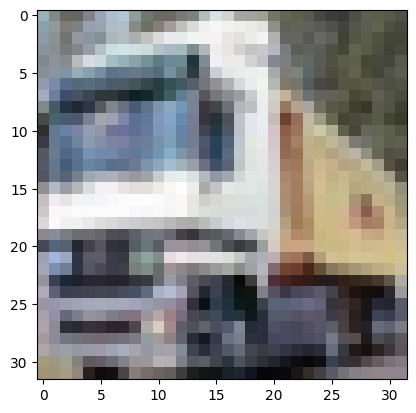

In [5]:
# Your code to show any sample image in the dataset. Use - plt.imshow()

# ...
plt.imshow(x_train[1])

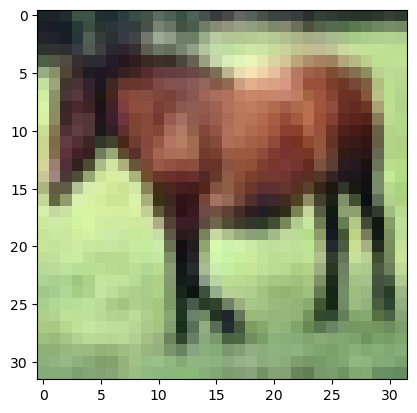

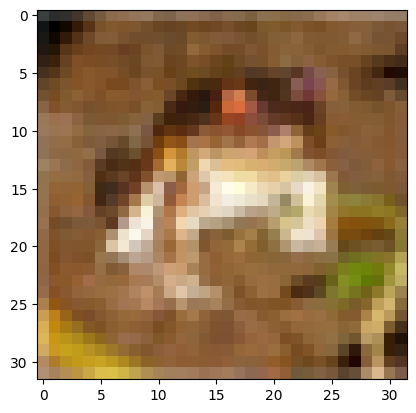

In [6]:
# Show any other image

# ...
plt.imshow(x_train[0])

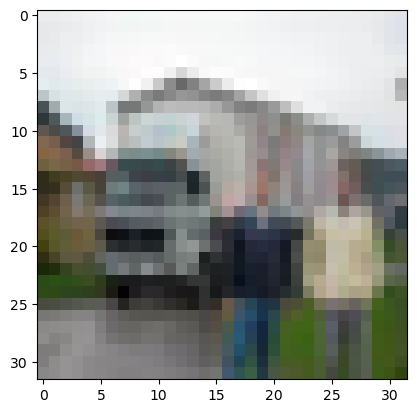

____________![image.png](attachment:ec501bd4-719c-4521-a042-5a3e92d1a2ce.png)

In [7]:
classes=['aircraft', 'car', 'bird', 'cat', 'deer','dog','frog', 'horse', 'ship', 'truck']
classes

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

['aircraft',
 'car',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

______![image.png](attachment:fa57c14c-c33a-463c-b864-33ca603c0602.png)

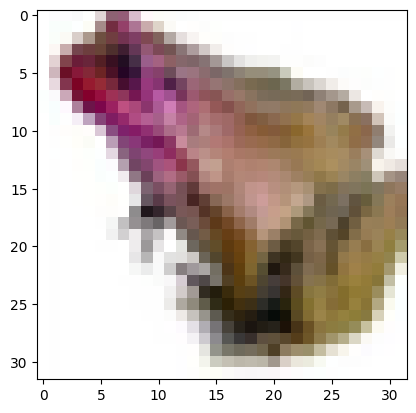

Picture number in the DataBase: 9482
Class number: [6]
Class name: frog


In [8]:
import random
from PIL import Image
n = random.randint(0, x_test.shape[0])
plt.imshow(Image.fromarray(x_train[n]))
plt.show()

print("Picture number in the DataBase:", n)
print("Class number:", y_train[n])

print("Class name:", classes[y_train[n][0]])

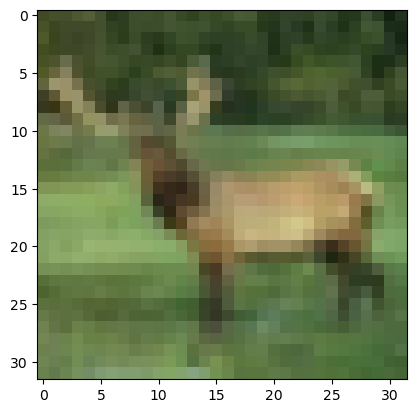

Picture number in the DataBase: 528
Class number: [4]
Class name: deer


## PreProcessing

In [9]:
# Your code to print one image in digitals. Check what pixels look like.

# ...
sample_image = x_train[0]
print( sample_image)


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [10]:
# Your code to print the shape of any image i.e particular value in the x_train

# ...
sample_image = x_train[0]
print( sample_image.shape)

(32, 32, 3)


(32, 32, 3)

In [11]:
# Your code to print the maximum value in x_train. Hint - Use .max()

# ...
print(x_train.max())


255


255

____________![image.png](attachment:c47e73b6-3b6c-48f0-9f63-60c3ac05b49a.png)

In [12]:
x_train = x_train / 255
x_test = x_test / 255


__________![image.png](attachment:d6ad574c-99ce-47f0-921e-16c5d5c834a6.png)

In [13]:
x_train.shape

(50000, 32, 32, 3)

(50000, 32, 32, 3)

![image.png](attachment:6ba77ea4-f0b3-47d3-b4dc-43379436ccef.png)

In [14]:
y_train.shape

(50000, 1)

(50000, 1)

## One hot vector encoding.
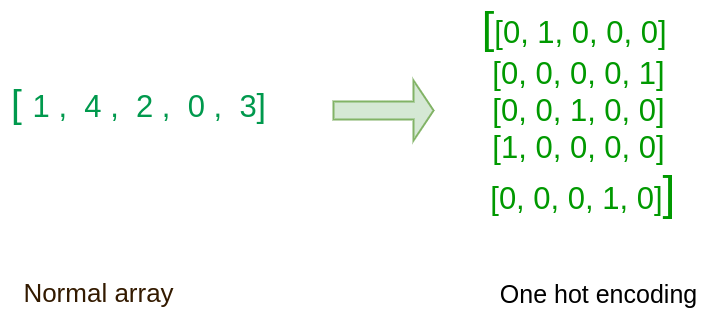


The "to_categorical()" is converting the integer value to binary categorical matrix : https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

________________![image.png](attachment:a3c55b01-b8ec-43ed-84fc-87aa32ce00c1.png)

In [15]:
import tensorflow
from tensorflow.keras.utils import to_categorical

___________![image.png](attachment:ab763c2b-0cdb-4b3b-8f5a-d27a56970b36.png)

In [16]:
y_cat_train = to_categorical(y_train,10)

In [17]:
# Your code to print the shape of the array y_cat_train.shape)

# ...
print(y_cat_train.shape)

(50000, 10)


(50000, 10)

In [18]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.

# Compare the result for better understanding of "to_categorical()"

# ...
# ...
print(y_train[10])

print(y_cat_train[10])

[4]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [19]:
# Your code to:
# Convert y_test to the encoded vector in the same manner
# Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test)

#  y_cat_test = ...
print(y_test[10])
print(y_cat_test[10])

[0]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


____________![image.png](attachment:da1f7f51-b12e-4339-a3b2-752b2cc8b8bd.png)

In [20]:
print(y_cat_test.shape)
print(y_test[0])
print(y_cat_test[0])

(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


(10000, 10)
[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


-----------------

## Creating a CNN Model

_____________![image.png](attachment:14a8b51e-4e4c-4b04-822b-66d686c17f1d.png)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [36]:
import keras
from keras import layers
from keras.layers import BatchNormalization

model = keras.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),


    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


__________![image.png](attachment:57973800-6bf3-4859-a5de-8c755266e1f2.png)

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,066 (894.79 KB)

 Trainable params: 228,106 (891.04 KB)

 Non-trainable params: 960 (3.75 KB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 446,826 (1.70 MB)

 Trainable params: 446,826 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


___________![image.png](attachment:ac5d04bf-67e9-4c93-abb0-5ec23bede602.png)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

__________![image.png](attachment:8e9c8785-a451-43d5-b8be-8b2f485f22c1.png)

In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)


In [41]:
# Your code to compile the models (model.compile).

# Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# You can use the optimiser of your choice

# ...
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
# Your code to fit the model (model.fit).

# Use additional parameter -  callbacks = [early_stop] to enable early stopping.
# Use 'history' array to save the training parameters for each epoch

# history = ....
history = model.fit(x_train, y_cat_train,
                    epochs=15,
                    validation_data=(x_test, y_cat_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.3937 - loss: 1.9023 - val_accuracy: 0.5648 - val_loss: 1.2183
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6058 - loss: 1.1086 - val_accuracy: 0.5582 - val_loss: 1.2807
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6769 - loss: 0.9180 - val_accuracy: 0.6558 - val_loss: 0.9798
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7172 - loss: 0.8143 - val_accuracy: 0.6694 - val_loss: 0.9674
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7502 - loss: 0.7259 - val_accuracy: 0.6250 - val_loss: 1.1239
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7720 - loss: 0.6560 - val_accuracy: 0.7179 - val_loss: 0.8243
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7948 - loss: 0.5904 - val_accuracy: 0.7273 - val_loss: 0.8141
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8135 - loss: 0.53

______________![image.png](attachment:cda5da4b-5237-4122-a78e-33907257e4ae.png)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.3481 - loss: 1.7774 - val_accuracy: 0.5303 - val_loss: 1.3498
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - accuracy: 0.5634 - loss: 1.2280 - val_accuracy: 0.5538 - val_loss: 1.2199
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.6255 - loss: 1.0565 - val_accuracy: 0.6245 - val_loss: 1.0497
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.6674 - loss: 0.9428 - val_accuracy: 0.6840 - val_loss: 0.9512
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7039 - loss: 0.8390 - val_accuracy: 0.6653 - val_loss: 1.0131
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7268 - loss: 0.7695 - val_accuracy: 0.6328 - val_loss: 1.2476
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 35ms/step - accuracy: 0.7585 - loss: 0.6951 - val_accuracy: 0.6821 - val_loss: 1.0933


##### You can save the model in a file. Following code shows how to do this.

________________![image.png](attachment:68ac77fe-dcec-4ef5-8ef7-1366e7880b59.png)

In [43]:
model.save('cifar_10epochs.keras')


##### Yiu can save the loss at every step. Following code shows how to do this.

___________![image.png](attachment:23c2cc57-6fab-4330-a0a4-27e66ac29316.png)

In [44]:
losses = pd.DataFrame(model.history.history)


In [45]:
# You code to print the first few rows of losses.

# ...
losses.head(7)

,accuracy,loss,val_accuracy,val_loss
0,0.48270,1.533568,0.5648,1.218259
1,0.62454,1.066482,0.5582,1.280727
2,0.68066,0.916747,0.6558,0.979849
3,0.71888,0.812297,0.6694,0.967351
4,0.74716,0.732748,0.6250,1.123920
5,0.76902,0.670189,0.7179,0.824270
6,0.78882,0.611661,0.7273,0.814054


,accuracy,loss,val_accuracy,val_loss
0,0.43480,1.560612,0.5303,1.349832
1,0.57198,1.201473,0.5538,1.219868
2,0.62928,1.049085,0.6245,1.049745
3,0.66792,0.944133,0.6840,0.951214
4,0.70052,0.851300,0.6653,1.013123
5,0.72508,0.783289,0.6328,1.247608
6,0.74762,0.724635,0.6821,1.093254


#### Visualise a plot between accuracy vs val_accuracy for all steps.

#### x axis will have the steps (epochs)
#### y axis will have accuracy and val_accuracy


_________![image.png](attachment:2770f356-c184-4ddf-839a-887df44fa151.png)

<Axes: >

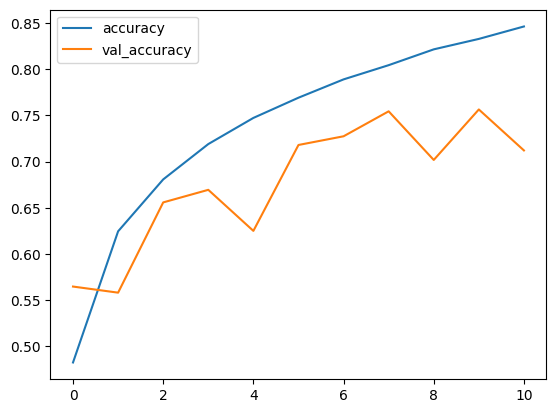

In [46]:
losses[['accuracy', 'val_accuracy']].plot()


<Axes: >

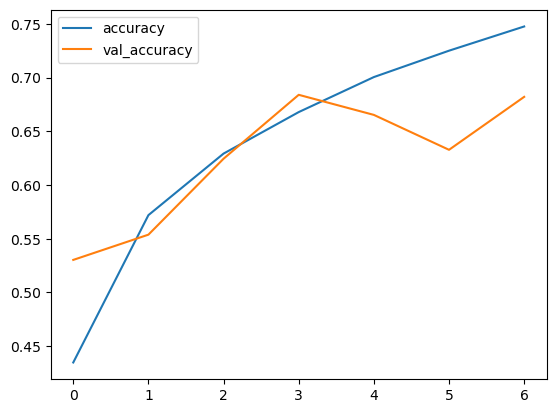

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

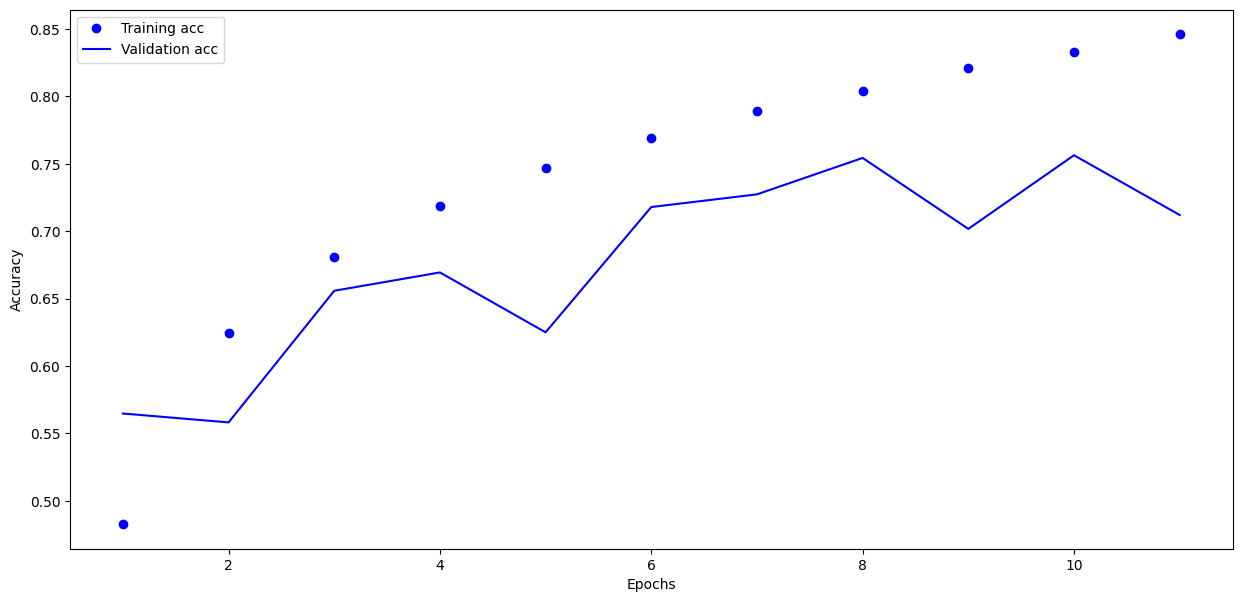

In [47]:
# Plot accuracy and val_accuracy for the neural network training process in more detail

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

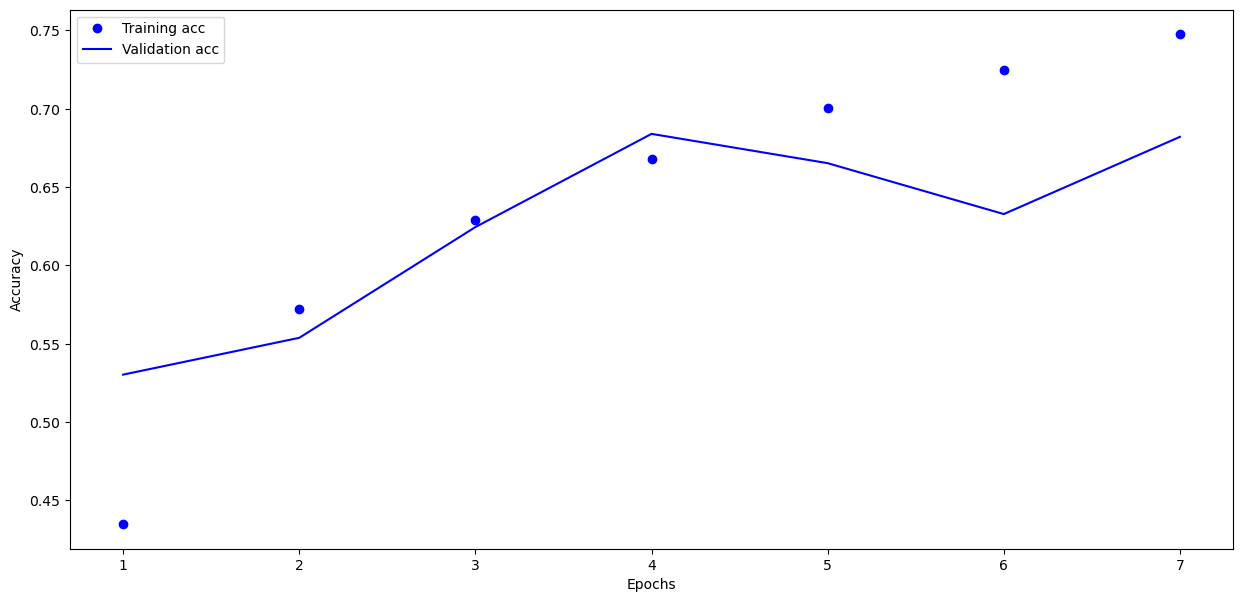

__________________![image.png](attachment:2eb527ec-d490-46af-a09c-8998063d7ffb.png)

<Axes: >

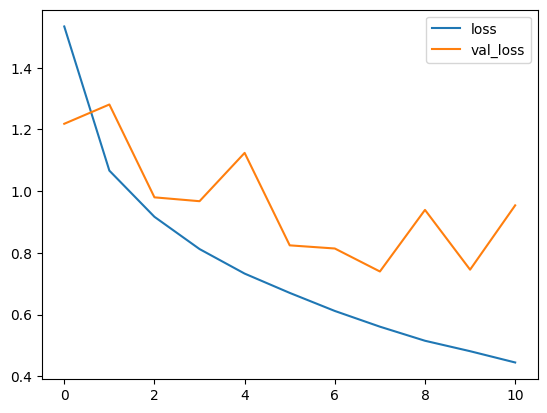

In [48]:
losses[['loss', 'val_loss']].plot()


<Axes: >

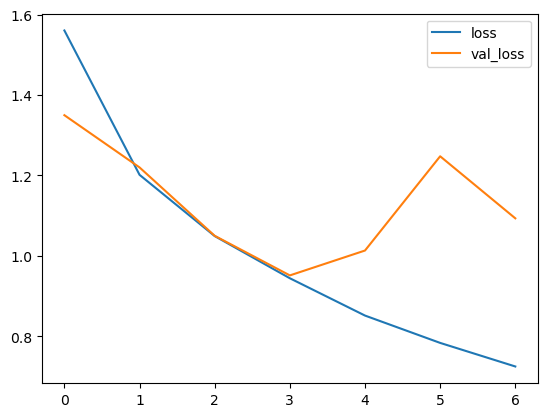

_____________________![image.png](attachment:f0968841-d78e-4ead-a51d-8a9433e8a93f.png)

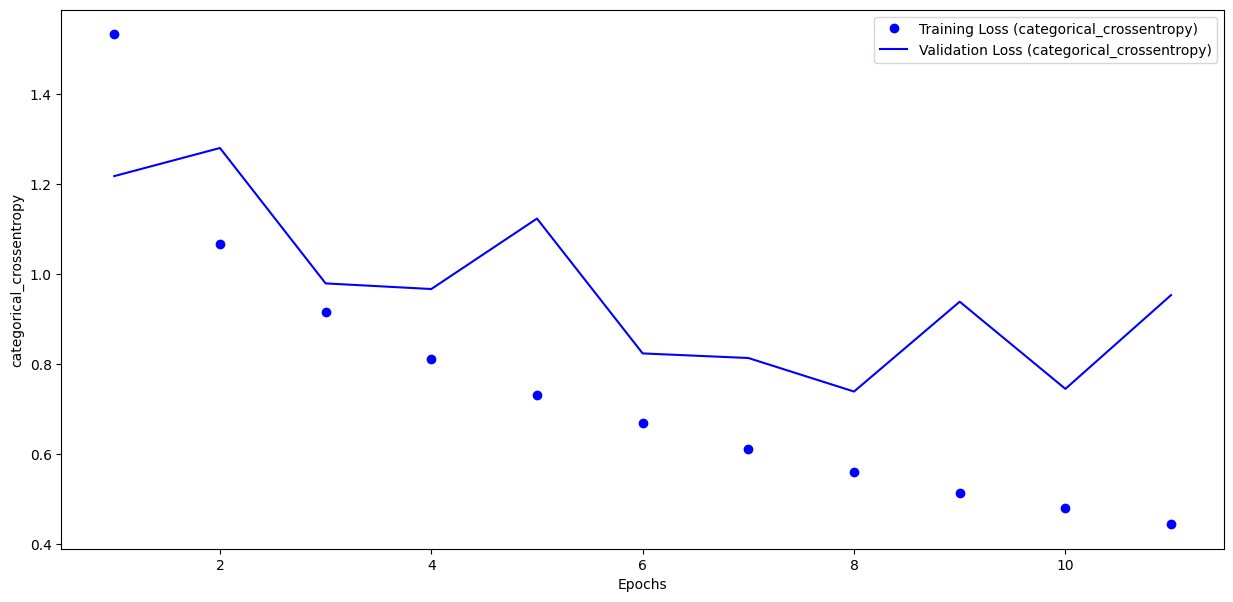

In [49]:
history_dict = history.history
# plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']

epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15, 7))
plt.plot(epochs, acc_values, 'bo', label='Training Loss (categorical_crossentropy)')
plt.plot(epochs, val_acc_values, 'b', label='Validation Loss (categorical_crossentropy)')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.legend()
plt.show()

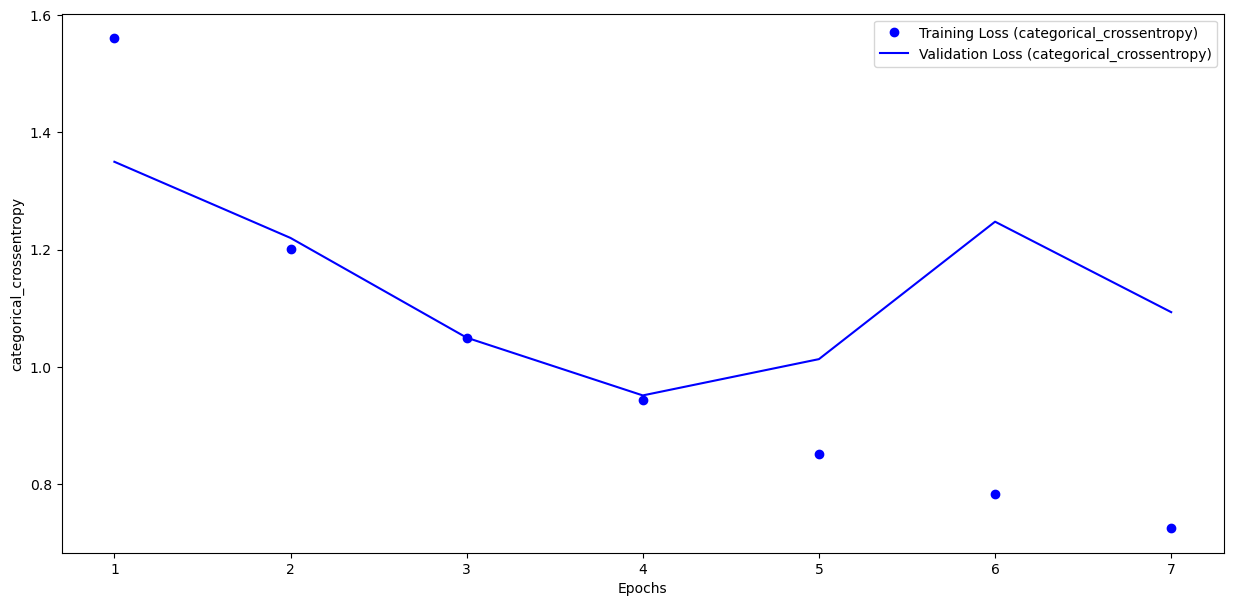

__________![image.png](attachment:79255b8c-3f6a-413f-a01c-ff576c5b6296.png)

In [50]:
model.metrics_names


['loss', 'compile_metrics']

['loss', 'compile_metrics']

___________![image.png](attachment:f9a09ad0-7094-406d-a1b8-ed28447d8340.png)

In [51]:
model.evaluate(x_test, y_cat_test, verbose=0)


[0.9539048671722412, 0.7120000123977661]

In [ ]:
# Evaluate the model

model.evaluate(x_test,y_cat_test,verbose=0)

[1.0932540893554688, 0.6820999979972839]

___________![image.png](attachment:8ae9cc13-b3b9-440d-9b0e-e0f0b6b56ee5.png)

In [52]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
# Make a prediction on the test data set

predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


_______________![image.png](attachment:65bb1c6a-f105-42cc-8dab-f09405db9609.png)

In [53]:
print(predictions)
print(predictions.shape)

[3 8 8 ... 5 4 7]
(10000,)


[3 8 1 ... 5 1 7]
(10000,)


##### You could get the full classification report.

_____________![image.png](attachment:56e761c0-de4a-4eb8-a980-577df7cd2756.png)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.53      0.66      1000
           1       0.92      0.78      0.85      1000
           2       0.63      0.59      0.61      1000
           3       0.57      0.49      0.53      1000
           4       0.71      0.68      0.69      1000
           5       0.56      0.73      0.64      1000
           6       0.63      0.90      0.74      1000
           7       0.86      0.67      0.75      1000
           8       0.78      0.86      0.82      1000
           9       0.74      0.90      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.82      0.76      0.79      1000
           2       0.81      0.38      0.52      1000
           3       0.56      0.45      0.50      1000
           4       0.56      0.76      0.64      1000
           5       0.53      0.72      0.61      1000
           6       0.83      0.68      0.75      1000
           7       0.76      0.74      0.75      1000
           8       0.80      0.75      0.77      1000
           9       0.62      0.89      0.73      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



##### You could also get and plot confusion matrix.

https://github.com/matplotlib/matplotlib/issues/14751

______________![image.png](attachment:ef57468e-4fa1-45b6-b6df-693c557771bf.png)

In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[530,  17, 127,  42,  36,  26,  20,   6, 137,  59],
       [  8, 782,   4,   6,   5,   6,  25,   0,  35, 129],
       [ 21,   2, 587,  58,  77, 106, 105,  15,  14,  15],
       [  4,   5,  52, 490,  51, 208, 139,  20,  11,  20],
       [  5,   2,  51,  50, 681,  50, 121,  30,   6,   4],
       [  1,   1,  40, 112,  25, 729,  51,  25,   5,  11],
       [  1,   2,  20,  37,  12,  20, 897,   3,   4,   4],
       [  6,   1,  26,  45,  70, 125,  32, 666,   3,  26],
       [ 14,   8,  24,  14,   6,  11,  13,   3, 860,  47],
       [  4,  30,   4,   8,   1,  13,  14,   4,  24, 898]])

array([[697,  33,  12,  17,  33,  20,  11,  15,  84,  78],
       [  8, 762,   1,   9,   1,   7,   7,   3,  18, 184],
       [ 77,   7, 378,  64, 190, 150,  53,  34,  17,  30],
       [ 21,  17,  14, 447, 117, 245,  32,  40,  20,  47],
       [ 14,   2,  11,  34, 760,  47,  19,  83,  12,  18],
       [  8,   4,  11, 106,  71, 717,  13,  40,   8,  22],
       [  7,   9,  21,  76, 107,  51, 684,   9,   8,  28],
       [ 13,   3,   8,  23,  74,  94,   3, 742,   5,  35],
       [ 62,  42,   4,  15,  12,  19,   3,   5, 748,  90],
       [  8,  47,   4,   7,   4,  15,   3,   7,  19, 886]], dtype=int64)

_______________![image.png](attachment:64bac925-38f8-4864-8a69-b857e298ee84.png)

<Axes: >

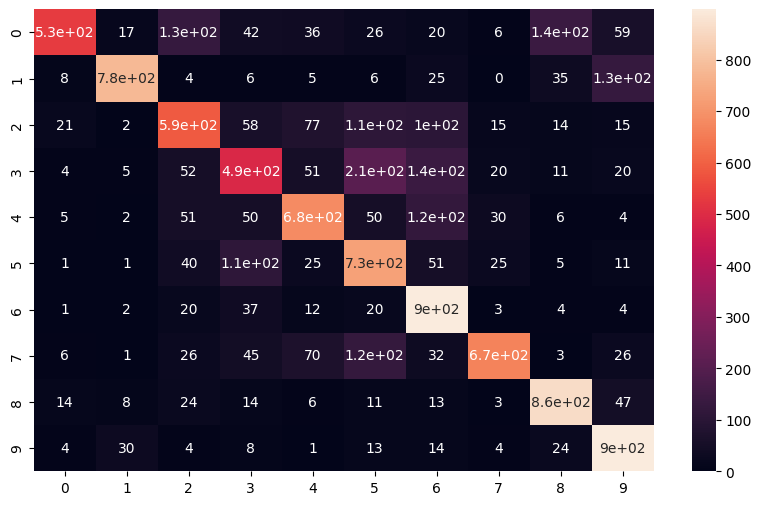

In [56]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

<Axes: >

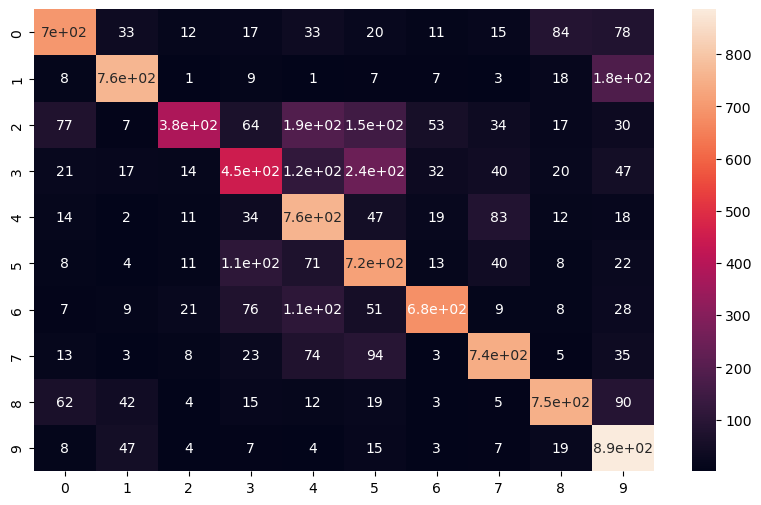

### Following code makes a prediction on specific image.

____________________![image.png](attachment:1f6d8fc7-4ecf-4bd5-801b-838814be909f.png)

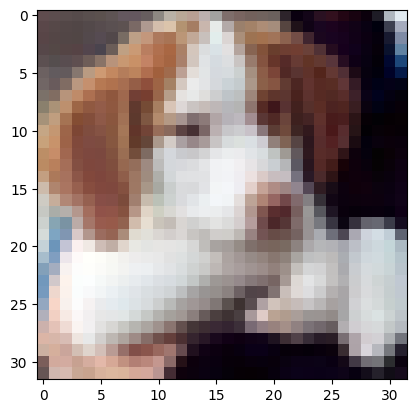

In [57]:
my_image = x_test[16]
plt.imshow(my_image)

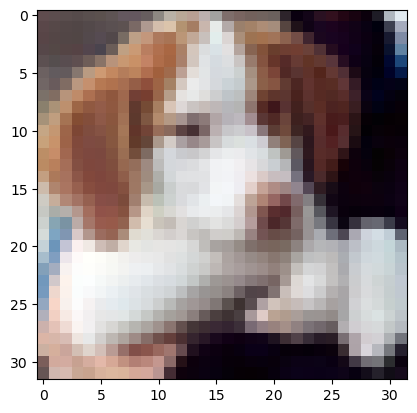

In [ ]:
my_image = x_test[16]
plt.imshow(my_image)

______________![image.png](attachment:61965a21-6a7e-41c5-951a-9d5d7d1b349a.png)

In [58]:
model.predict(my_image.reshape(1, 32, 32, 3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step


array([[7.3774514e-05, 3.4180517e-05, 3.7190542e-04, 2.9176211e-02,
        9.7968652e-05, 9.2191696e-01, 2.4813766e-05, 4.7711588e-02,
        3.7614707e-05, 5.5503682e-04]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


array([[1.13101294e-07, 3.55311378e-04, 8.73138470e-06, 8.25540442e-03,
        4.04348157e-07, 9.91317272e-01, 2.81208969e-07, 4.03509657e-05,
        4.70231180e-06, 1.75437362e-05]], dtype=float32)

In [ ]:
# Find the highest probability value in the vector above.
# What output value does it point to?

_______________![image.png](attachment:739e18f8-7704-4603-b636-21d498f2f94e.png)

In [59]:
prediction = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)), axis=-1)
print(prediction)
print("Class name:", classes[prediction[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
[5]
Class name: dog


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
[5]
Class name: dog


### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

<html> <h4 style="font-style:italic; color:blue;"> Just run the next 3 cells using 'Ctrl' + 'Enter' </h4> </html>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


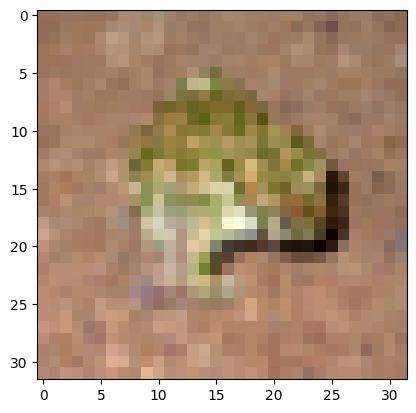

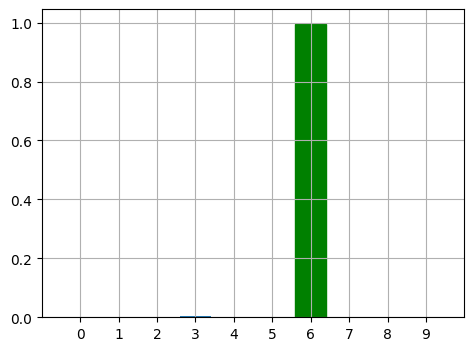

The predicted answer: frog 
 Correct answer: frog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [60]:
from tensorflow.keras.preprocessing.image import array_to_img

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,
# which this neural network will recognise with the probability indicated on the graph.

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the model's summary

### 2. Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends.

### 3. Based on this analysis, determine the optimal number of epochs for training your model.

<html> <h2 style="font-style:italic; color:blue;"> Task 2 (Optional): </h2> </html>

#### Evaluate your model for different optimisers available in the Keras.

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [ ]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser